In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from mne_bids import BIDSPath
from nilearn.plotting import plot_markers
from nilearn import datasets

from utils import get_sub_coords, get_coord_atlas_labels

plt.style.use("figures.mplstyle")

In [2]:
result_path = BIDSPath(
    root="../results", datatype="audioxcorr", extension=".h5", check=False
)
result_files = result_path.match()
len(result_files)

9

In [3]:
sub_xcorrs = []
for result_path in result_files:
    with h5py.File(result_path, "r") as f:
        corrs = f['corrs'][...]
        lags = f['lags'][...]

        sub_xcorrs.append(corrs)

all_xcorrs = np.vstack(sub_xcorrs)
print(all_xcorrs.shape)

(1268, 10241)


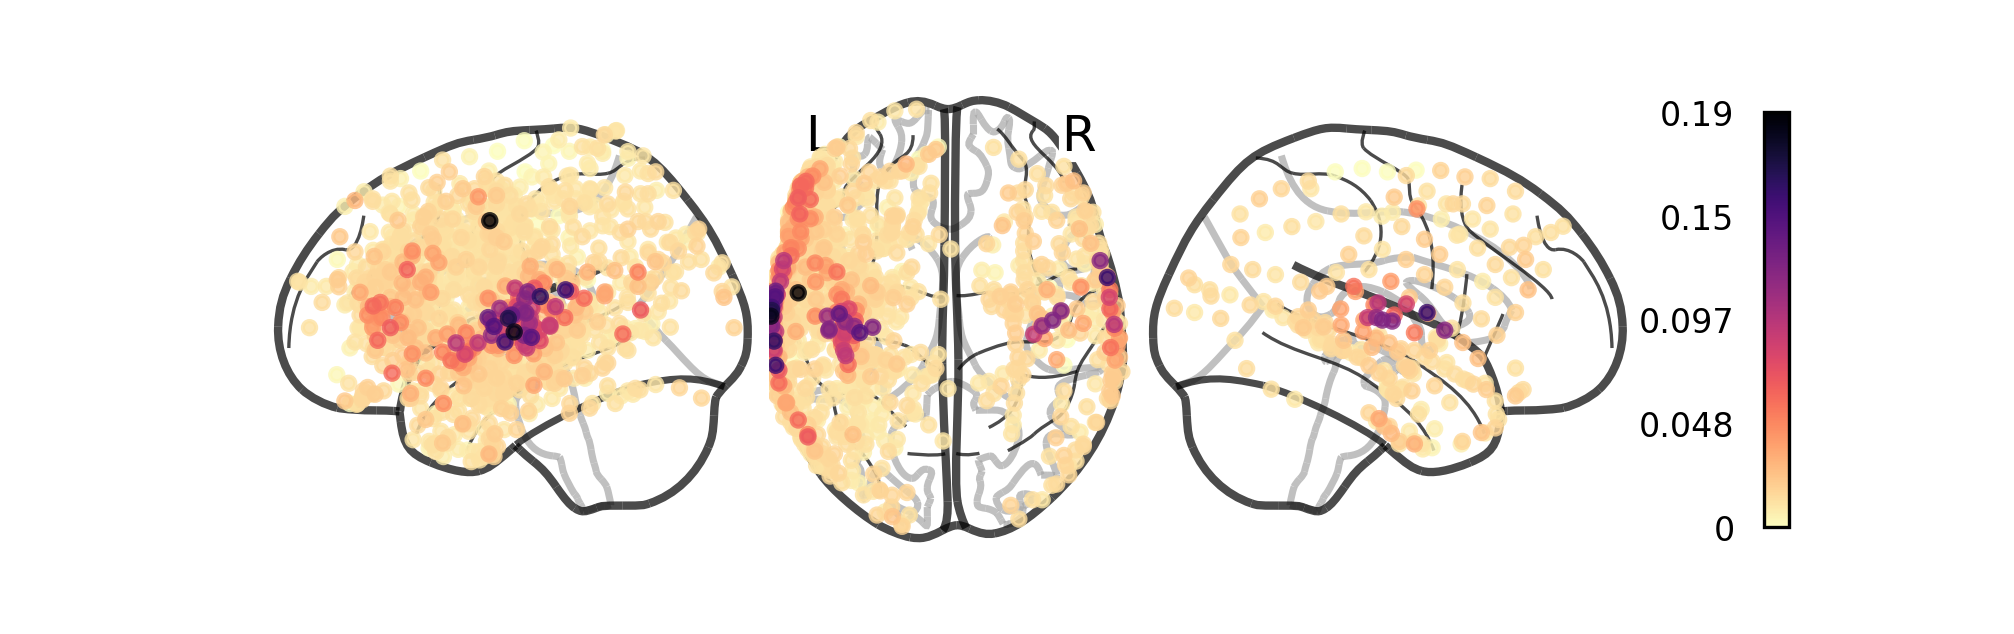

In [4]:
coords = get_sub_coords()
values = all_xcorrs.max(-1)

order = values.argsort()
fig, ax = plt.subplots(figsize=(2.2*3, 2), layout='constrained', dpi=300)
plot_markers(values[order], coords[order],
                node_size=10, display_mode='lzr',
                node_cmap='magma_r', colorbar=True,
                alpha=0.8, node_vmin=0,
                figure=fig, axes=ax)
fig.savefig("../figures/figure2/xcorr-brainmap.svg")
fig.show()

In [5]:
atlas = datasets.fetch_atlas_destrieux_2009()
indices = atlas['labels'].index
names = atlas['labels'].name
atlas_labels = {idx: name for idx, name in zip(indices, names)}

original_elec_labels = get_coord_atlas_labels(coords, atlas['maps'], atlas_labels)
elec_labels = [label.split()[1].split("_", 1)[1] for label in original_elec_labels]  # for destrieux
roi_mask = np.isin(elec_labels, ['temp_sup-Lateral'])

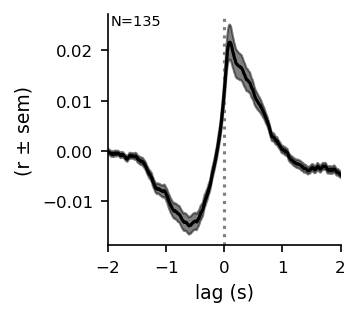

In [6]:
mean = all_xcorrs[roi_mask].mean(0)
err = all_xcorrs[roi_mask].std(0) / np.sqrt(all_xcorrs[roi_mask].shape[0])

xaxis = lags / 512

fig, ax = plt.subplots(figsize=(2, 2))
ax.axvline(0, c='gray', ls=':')
ax.fill_between(xaxis, mean - err, mean + err, alpha=0.5, color='k')
ax.plot(xaxis, mean, color='k')
ax.set_xlabel("lag (s)")
ax.set_ylabel("(r ± sem)")

ax.text(x=0.01, y=1,
        s=f"N={len(all_xcorrs[roi_mask])}", fontsize=7,
        transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='left')

ax.set_xlim(-2, 2)

fig.savefig('../figures/figure2/xcorr-timecourse.svg')
fig.show()

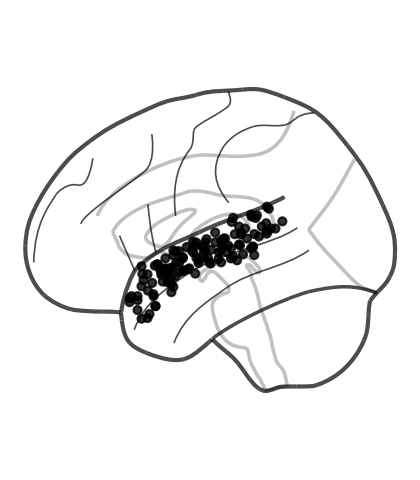

In [7]:
fig = plot_markers(np.ones(roi_mask.sum()), coords[roi_mask],
            node_size=15, display_mode='l',
            alpha=0.8, colorbar=False,
            node_cmap='Grays', node_vmin=0, node_vmax=1)
fig.savefig('../figures/figure2/stg-roi.svg')

# per sub

In [8]:
from mne.io import read_raw_fif

In [9]:
# get coords
edf_path = BIDSPath(root="../../monkey/derivatives/ecogprep", datatype="ieeg", description="highgamma", extension=".fif")

sub_coords = []
sub_ch_names = []
for raw_fif in edf_path.match():
    print(raw_fif)
    raw = read_raw_fif(raw_fif, verbose=False)
    ch2loc = {ch['ch_name']: ch['loc'][:3] for ch in raw.info['chs']}
    coords = np.vstack([ch2loc[ch] for ch in raw.info['ch_names']])

    sub_coords.append(coords)
    sub_ch_names.append(raw.info['ch_names'])

../../monkey/derivatives/ecogprep/sub-01/ieeg/sub-01_task-monkey_desc-highgamma_ieeg.fif
../../monkey/derivatives/ecogprep/sub-02/ieeg/sub-02_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-03/ieeg/sub-03_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-04/ieeg/sub-04_task-monkey_desc-highgamma_ieeg.fif
../../monkey/derivatives/ecogprep/sub-05/ieeg/sub-05_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-06/ieeg/sub-06_task-monkey_desc-highgamma_ieeg.fif
../../monkey/derivatives/ecogprep/sub-07/ieeg/sub-07_task-monkey_desc-highgamma_ieeg.fif


../../monkey/derivatives/ecogprep/sub-08/ieeg/sub-08_task-monkey_desc-highgamma_ieeg.fif
../../monkey/derivatives/ecogprep/sub-09/ieeg/sub-09_task-monkey_desc-highgamma_ieeg.fif


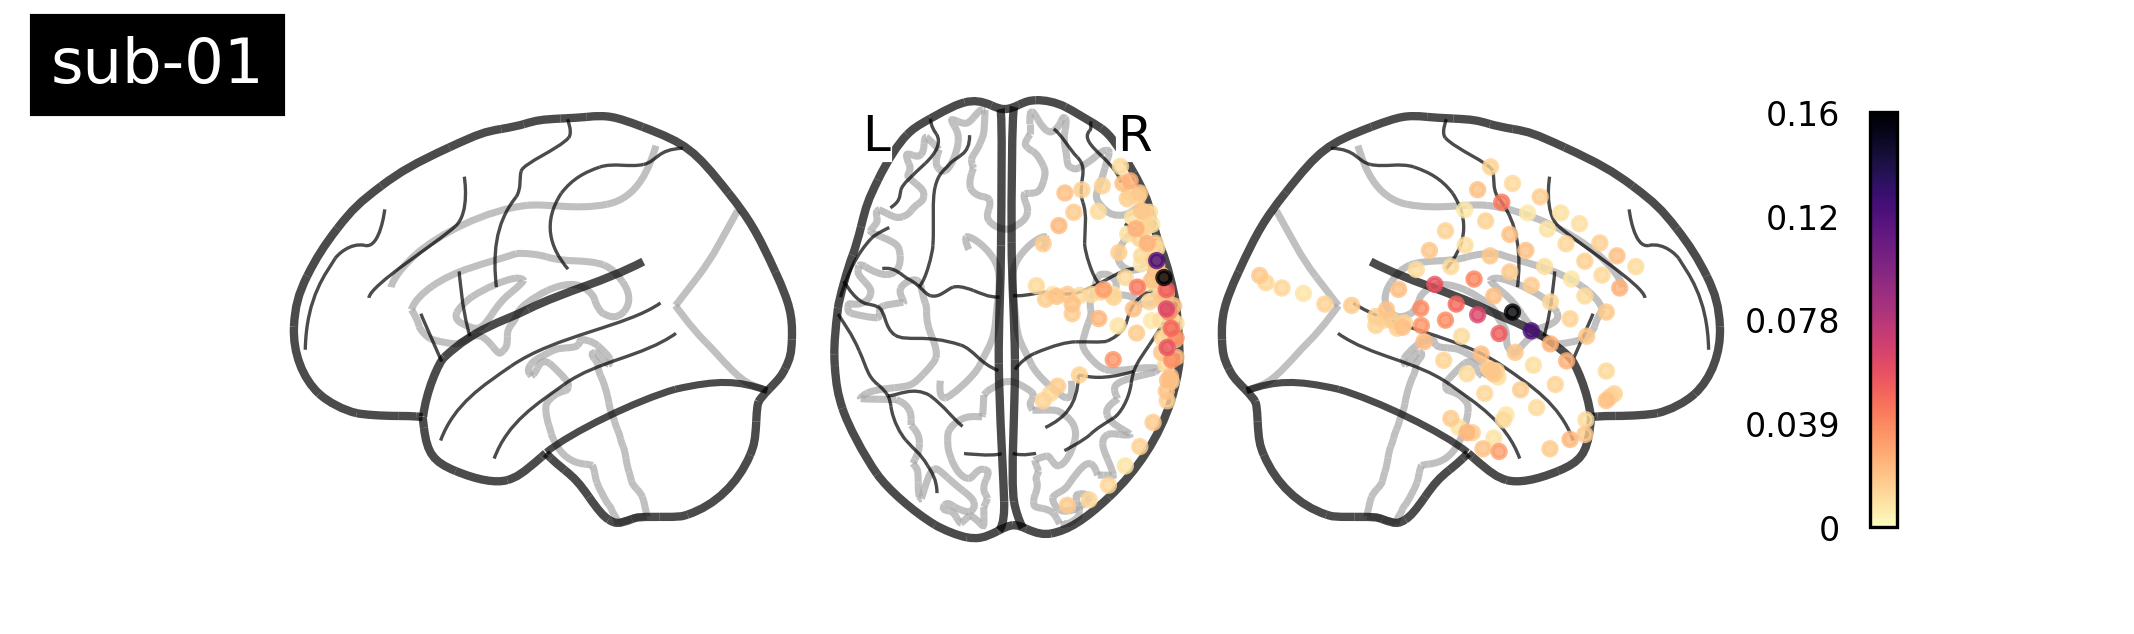

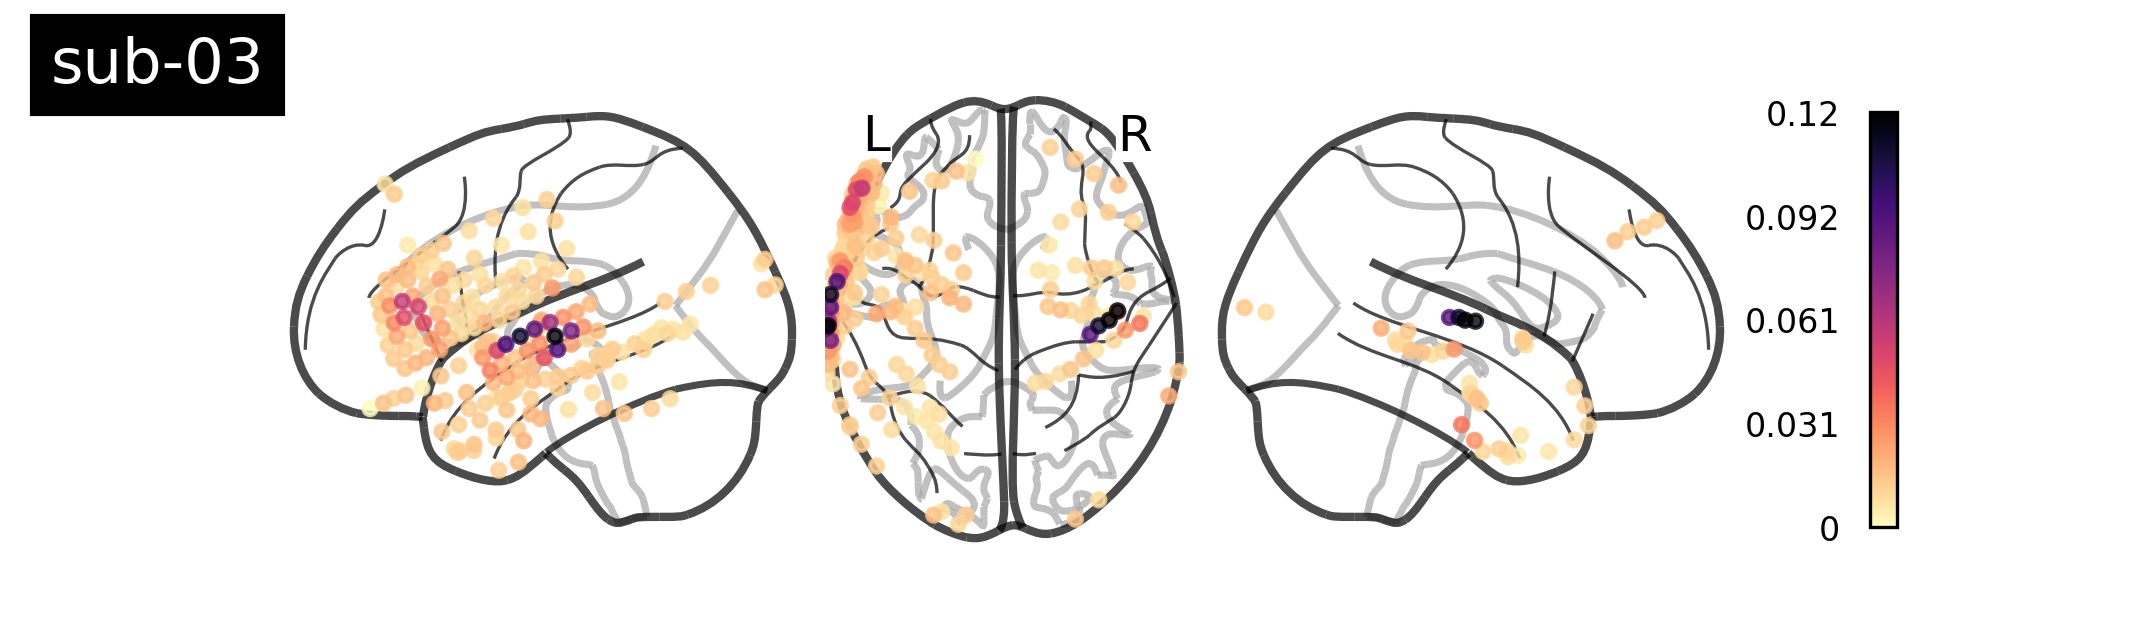

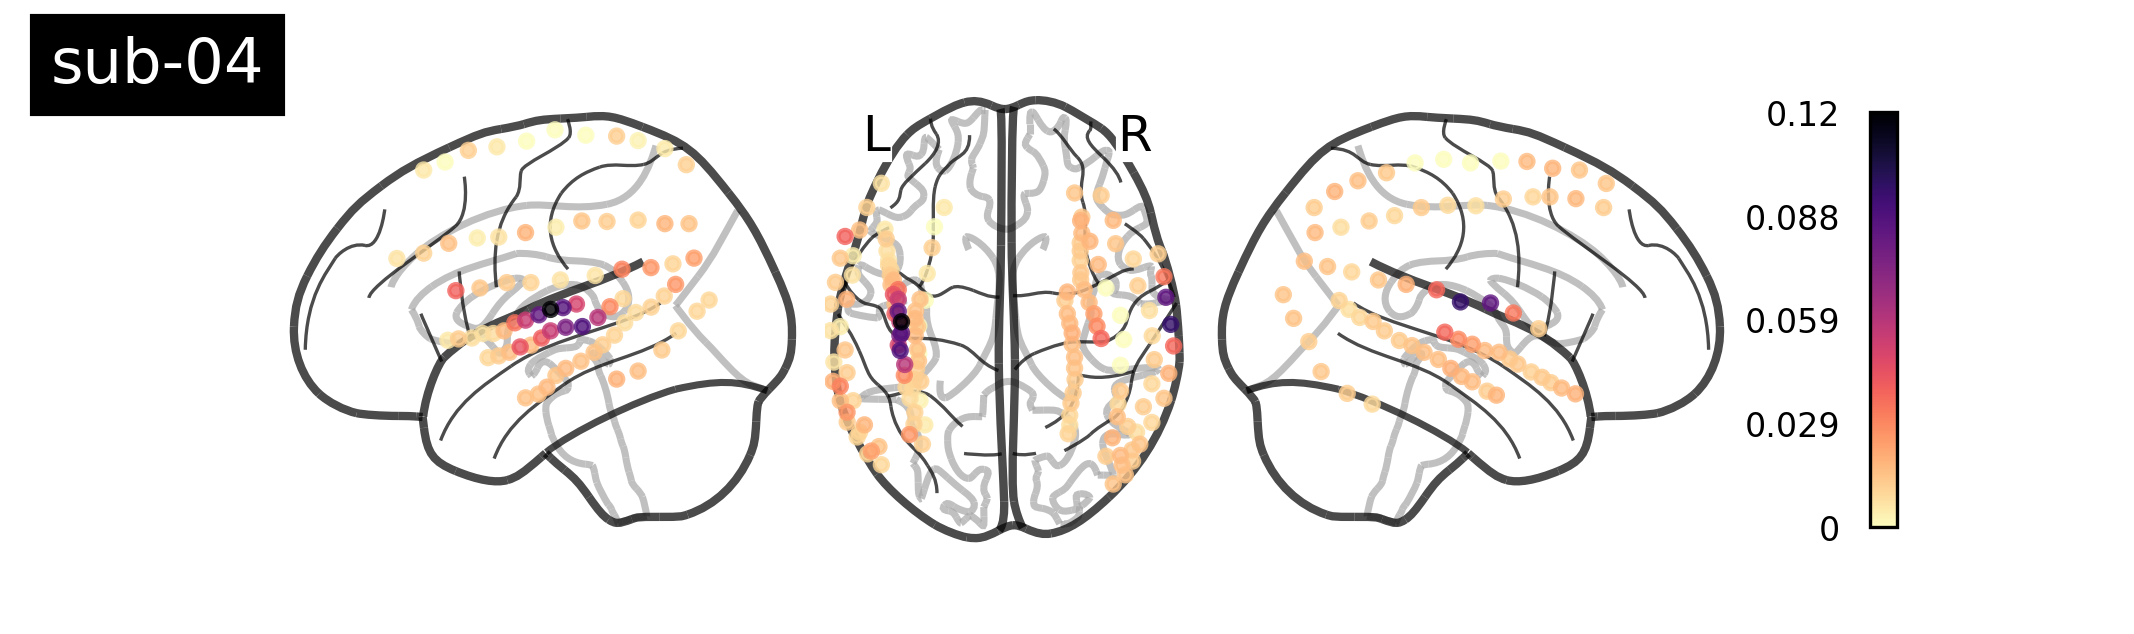

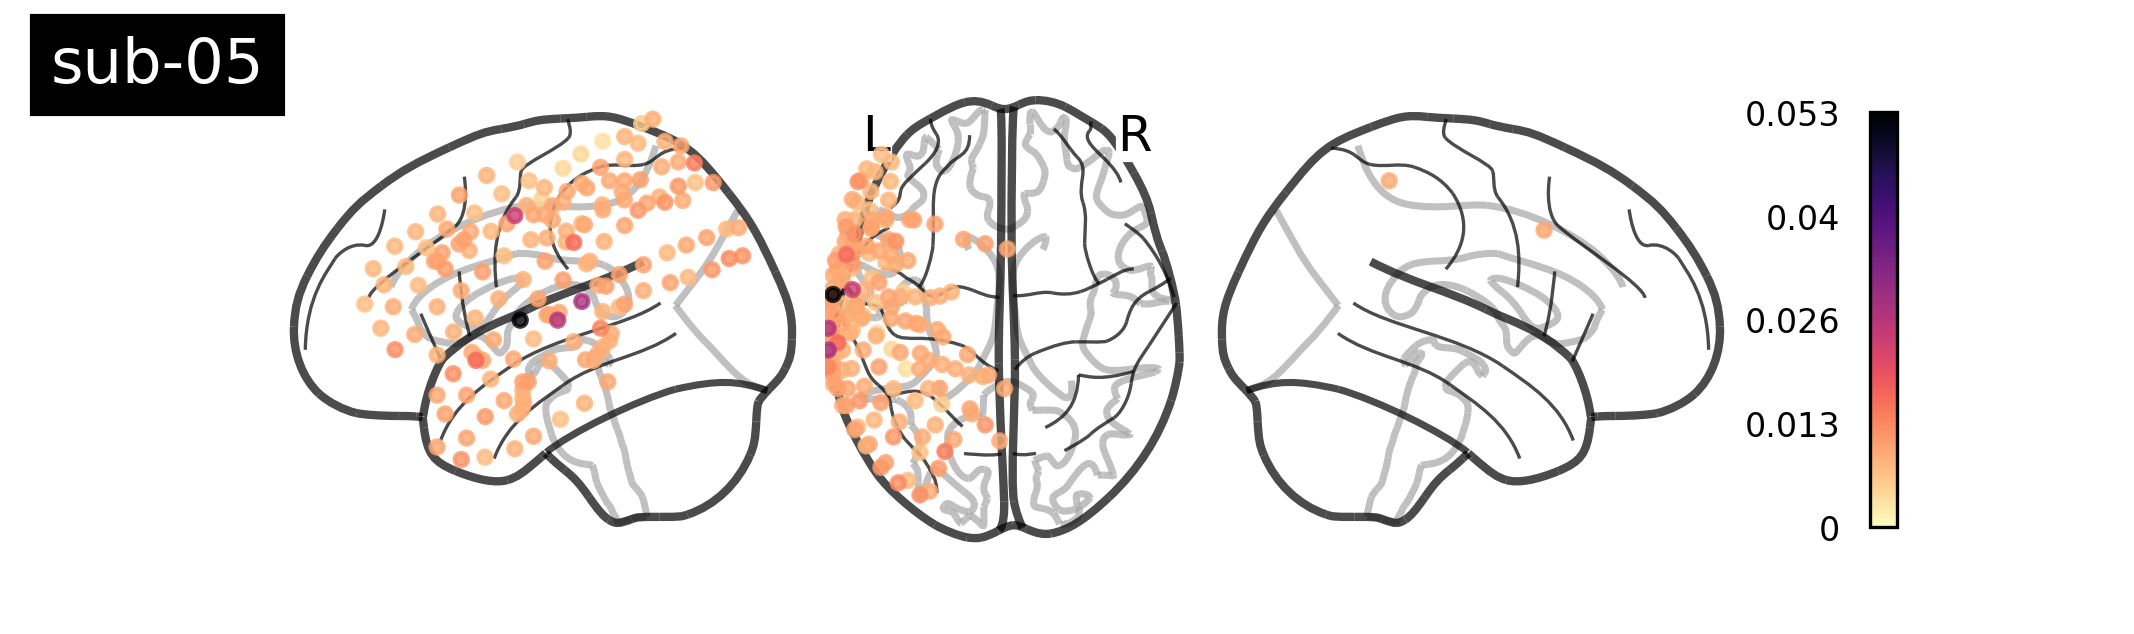

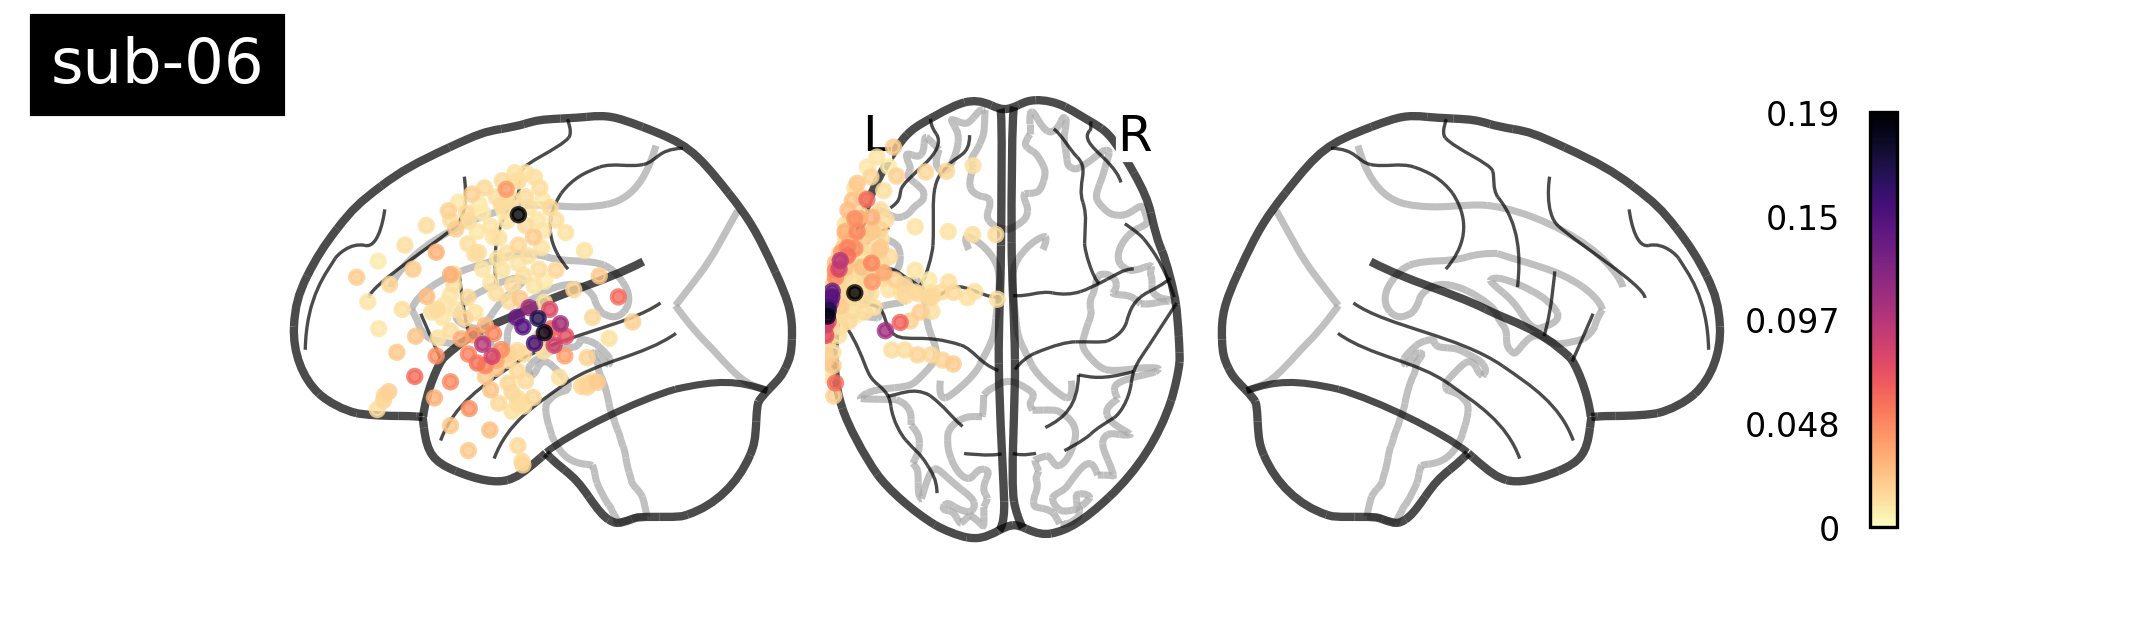

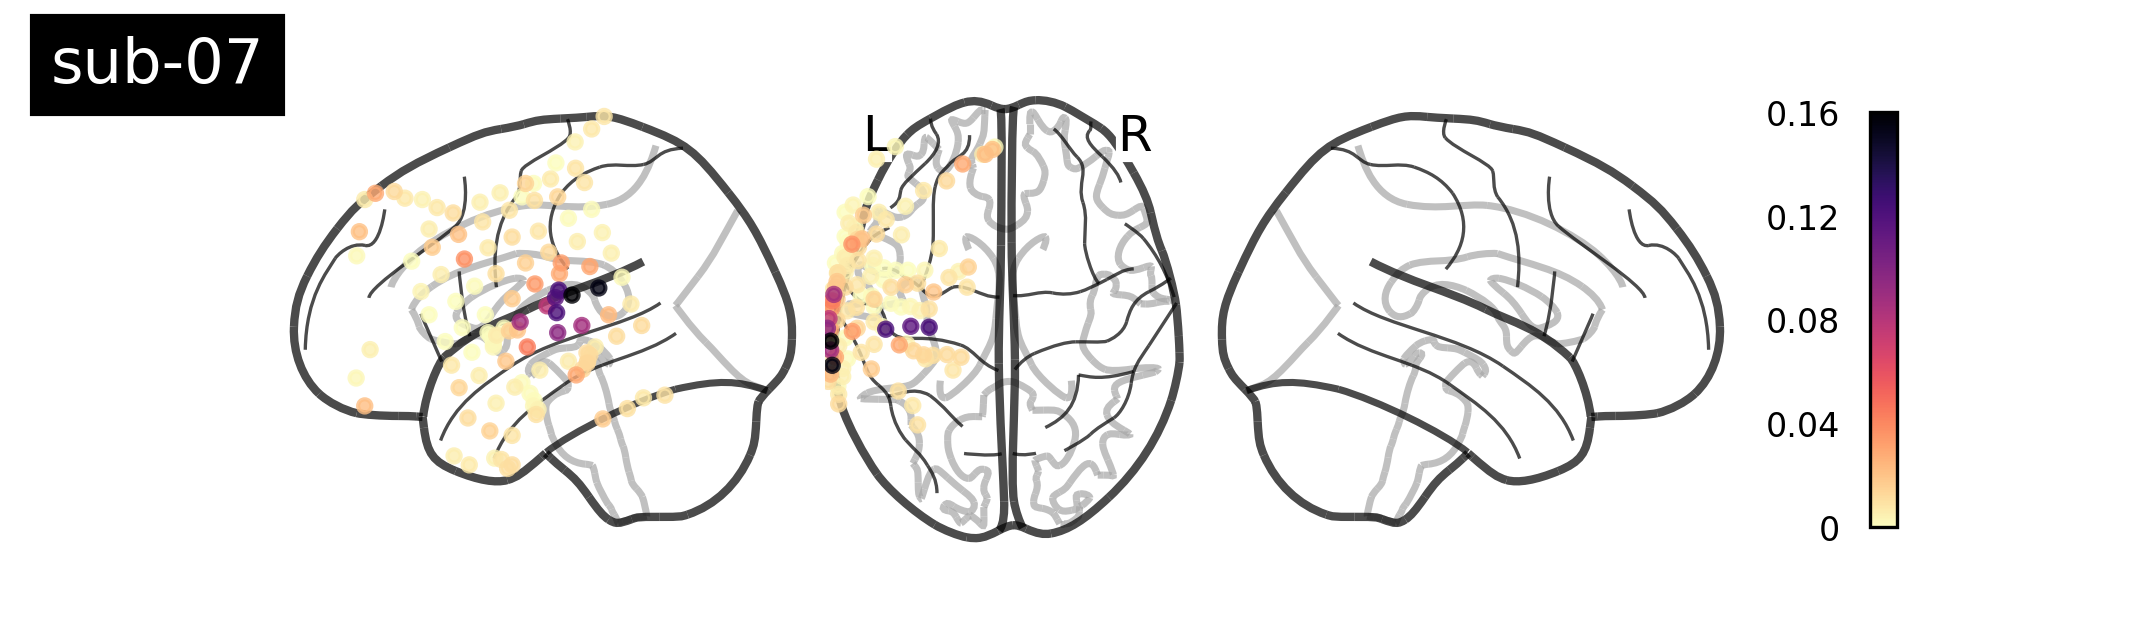

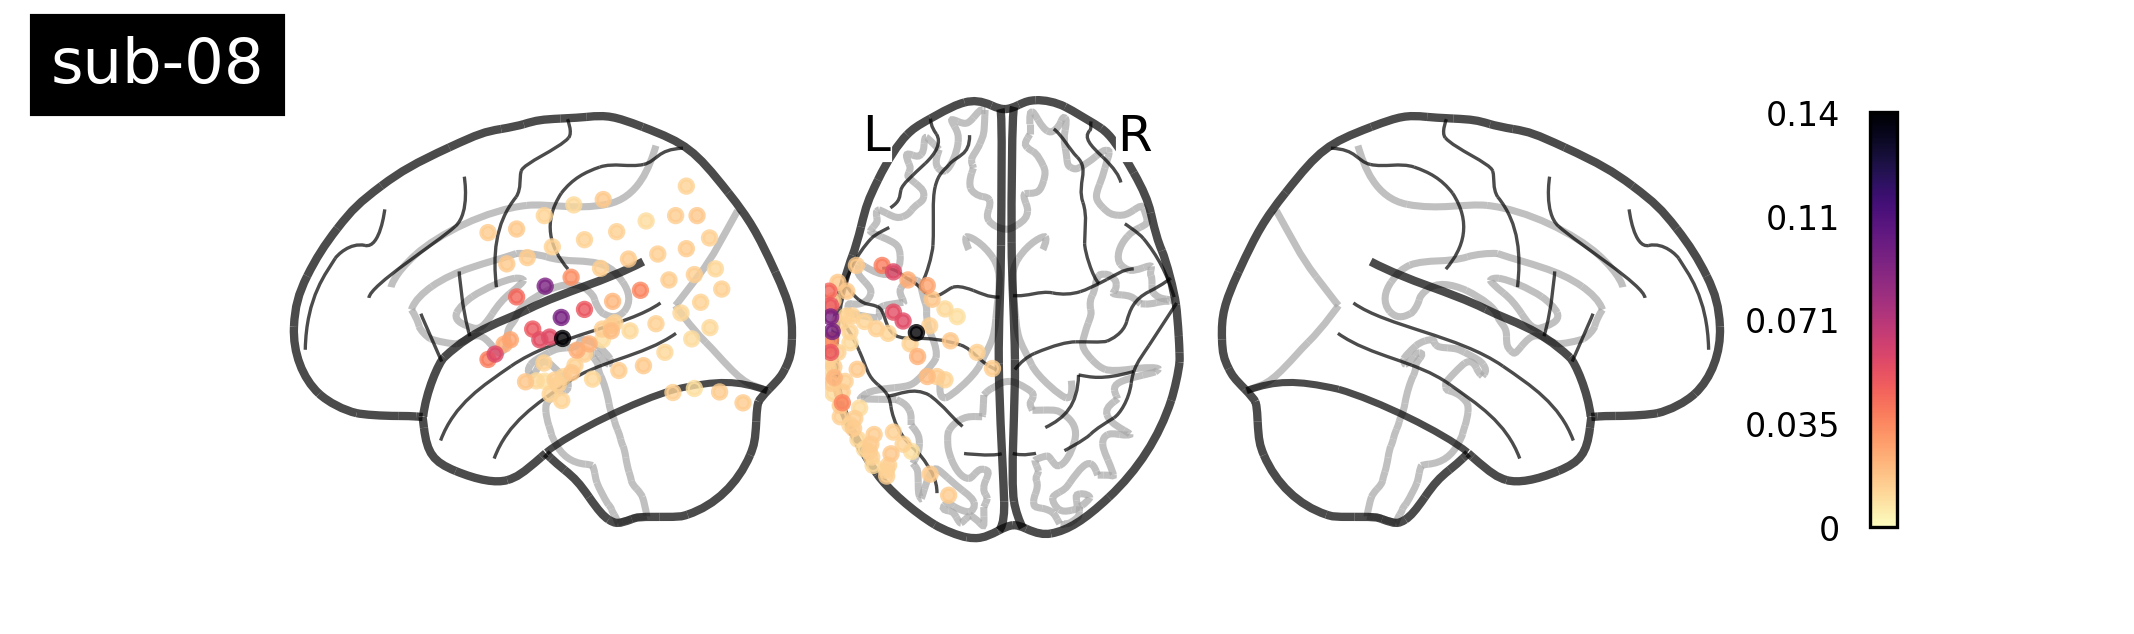

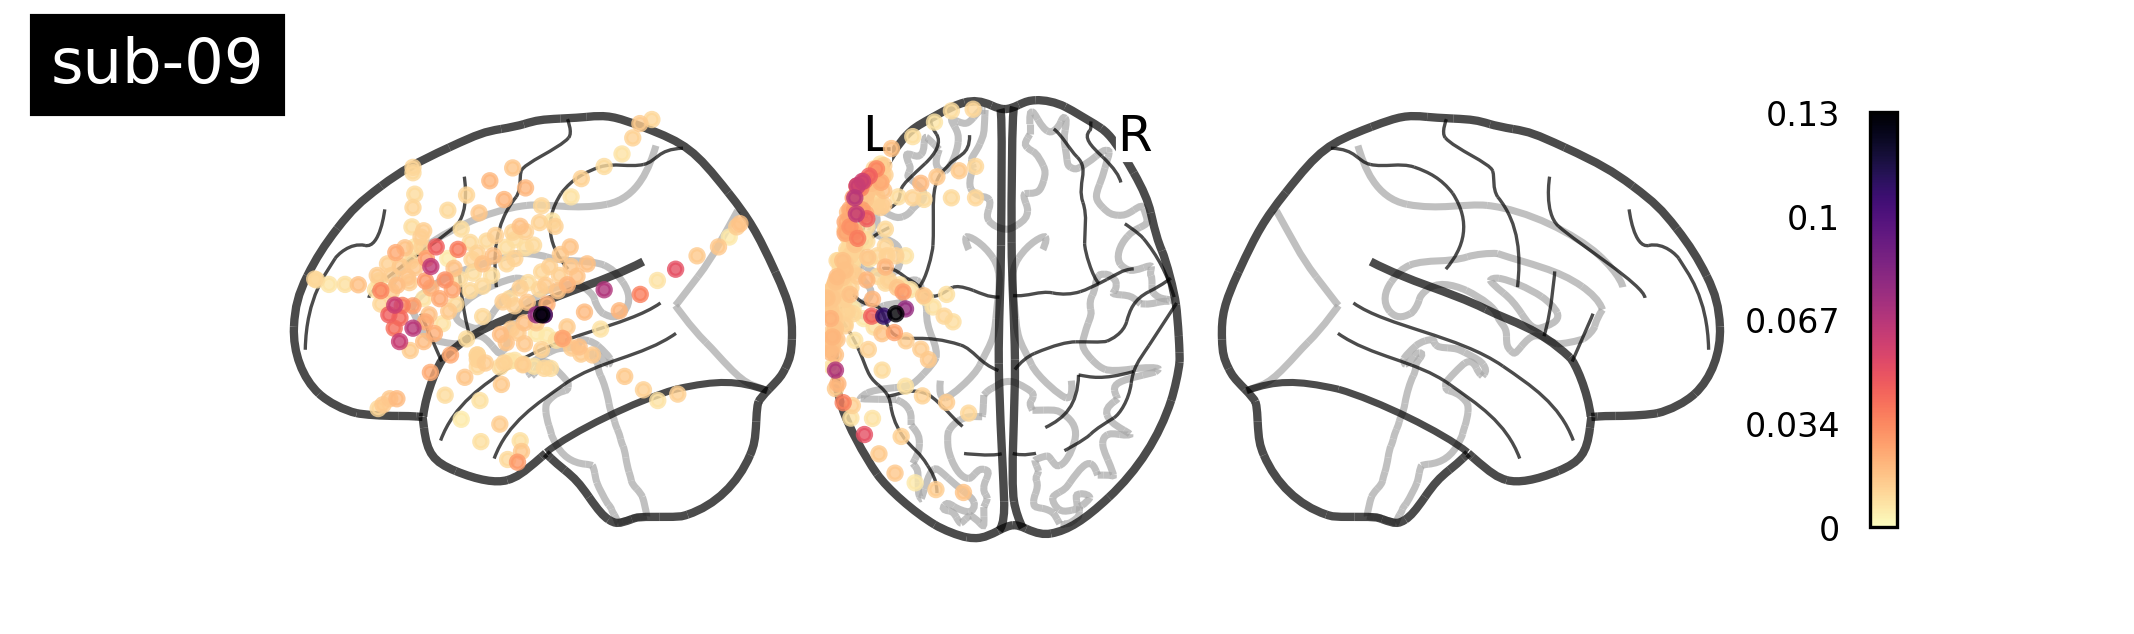

In [10]:
for i in range(len(sub_coords)):
    values = sub_xcorrs[i].max(-1)
    coords = sub_coords[i] * 1000
    order = values.argsort()
    fig, ax = plt.subplots(figsize=(7, 2), layout='constrained', dpi=300)
    plot_markers(values[order], coords[order],
                    node_size=10, display_mode='lzr',
                    node_cmap='magma_r', colorbar=True,
                    alpha=0.8, node_vmin=0, title=f'sub-{i+1:02d}',
                    figure=fig, axes=ax)
    fig.show()

In [11]:
sub_xcorrs[4].max(-1).argsort()

array([105, 107, 106,  22,   6, 103,  79,  14,  10, 115,  12,  28,  13,
         7, 112,  50,  17,  65,  71,  61,  96,   0,  97, 108,  74,   9,
        20,  15,  81,   1,  85,   3, 104,  48,   2,   8,  92, 121,  29,
       113,  33,  93,  69,   5,  31, 109,  19, 116,  84,  25,  35,  91,
       122, 118, 100,  45, 125,  95, 157, 119, 102,  67,  32,  34, 126,
       124, 128,  59, 120,  88,  16,  58, 158,  90, 127,  87, 134,  99,
        26,  70, 155, 101, 150,  77,  24, 144, 151, 156,  11, 143, 132,
        41, 133, 154, 117,  30, 145,  38,  94,  49, 147, 131, 129, 146,
        73, 130, 114,  56,  83, 110, 153, 148, 135, 136, 142, 139, 137,
        72, 123, 149,  66,  54,  43,  47,  36,  98,   4,  68,  75,  53,
       141,  76, 140,  46, 138,  89,  44,  27,  57,  78,  18,  55,  82,
        80,  64, 152, 111,  62,  39,  23,  63,  60,  86,  37,  40,  21,
        51,  52,  42])

In [12]:
sub_ch_names[4][42]

'GA45'

In [13]:
sub_xcorrs[5].max(-1).argsort()

array([ 47,  82, 163,  64,  83,  16,  88,  92,  71,  89,  57,  70,  18,
        42, 112, 104, 164,  56,  26,  66,  87,  10, 156,  93,  84, 157,
         3,  69,  19, 132, 134,  85,  17,  30, 136, 160, 161,  29,  46,
        78,  94, 124,  14, 149, 108,   2, 162,  25,  86,  67, 128,  91,
       135,  63, 159,  65,  80, 103,   8,  49,  76,  39, 155, 141, 133,
       105,  31, 102,  81, 120,   0, 142, 111,  95,  77,   9,   7, 154,
       165,  27,  68, 127, 158, 125,  75,  34, 123, 144, 143,  37, 139,
         1, 110,  90, 119, 130, 118, 129,  13,  38,  79, 126,  12,  48,
       145,  11, 113, 140, 138, 146,  23,  22,   6, 151, 131,  15, 150,
        24,  55,  74, 137,  40, 122,  58,  62,   4,  61,  96,  50, 117,
        45,  41,  54,  35,  60,  32,  33,  43, 147, 101, 114,  72,  53,
        51,  36,  52, 148, 109, 121,  44,   5,  59, 152,  21,  20, 116,
       100, 115, 153,  97, 106,  28, 107,  98,  99,  73])

In [14]:
sub_ch_names[5][73]

'G75'